<font color="Black" size=+6.5><b>Advanced Business Analytics</b></font>

<font color="Black" size=+2.5><b>Olist - Brazilian E-Commerce</b></font>


<font color="Black" size=+2.5><b>Project - Notebook</b></font>

* s202024 - Arnar Tjörvi Charlesson
* s202034 - Bjarki Thor Hilmarsson
* s202033 - Thorvaldur Ingi Ingimundarson

# Introduction

For this project we will dive into the the Brazilian E-commerce public dataset by Olist. The dataset has information of 100k orders from 2016 to 2018 made at Olist, the largest Brazilian E-commerce store. The information within the datasets allows viewing an order from multiple dimensions, from order status, price and payment information to customer review, rating and location.

The data ha been anonymised by replacing all references to companies and partners with names from the popular book and TV series, Game of Thrones.

Olist connects small businesses from all over Brazil to channels. Those businesses are than able to sell their products through the Olist store online, and ship them directly to customers via Olist's logistics partners.

After a customer purchases a product from the Olist store, the seller responsible for that product gets notified to fulfill that order. Then, after the customer has received the product, or the estimated delivery day is due, the customer is able to rate and review is experience.

The data provided by Olist comes in eight .csv files and the way they are all connected can be seen in the figure below.

<img src="https://i.imgur.com/HRhd2Y0.png" width=700 height=700 />

In addition .csv files seen in the figure above, a .csv file storing information about the English product category names was provided as well.

## What will be explored in this project

In this project we will try to implement a recommender system for customers. We will implement several systems, compare them and find out which system delivers the best result.


Finally, we will do a sentimental analysis on the reviews. Using an external dataset, we will construct several sentimental classifier models, compare them and then classify the reviews in the olist data set using the chosen model. The reason for not constructing the model using the olist dataset is to get a more scalable, more unbiased classifier. Then after classifying the order reviews. We will look into why some reviews are predicted positive, and yet get low review scores, and the opposite.

In [1]:
#Using that, we will try to explain why customers, who do not write a review, are happy or sad.

# Libraries

First we will import all necessary packages and set default parameters for plots.

In [2]:
import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk", rc={"lines.linewidth": 2.5}, font_scale=0.8)
sns.set_style("whitegrid")

%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (12, 6)

# Reading the Data

Next step is to read in all nine .csv files and store them as separate dataframes.

In [4]:
path = 'C:\\Users\\bjark\\Desktop\\final_aba\\olist'
file_name = [
    "olist_order_reviews_dataset.csv", "olist_customers_dataset.csv",
    "olist_orders_dataset.csv", "olist_geolocation_dataset.csv",
    "olist_products_dataset.csv", "olist_order_items_dataset.csv",
    "olist_sellers_dataset.csv", "olist_order_payments_dataset.csv",
    "product_category_name_translation.csv"
]

In [5]:
df_reviews = pd.read_csv(path + "/" + file_name[0], parse_dates=[5, 6])
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [6]:
df_customers = pd.read_csv(path + "/" + file_name[1])
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
df_orders = pd.read_csv(path + "/" + file_name[2], parse_dates=[3, 4, 5, 6, 7])
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [8]:
df_geolocation = pd.read_csv(path + "/" + file_name[3])
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
df_products = pd.read_csv(path + "/" + file_name[4])
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
df_orderItems = pd.read_csv(path + "/" + file_name[5], parse_dates=[4])
df_orderItems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
df_sellers = pd.read_csv(path + "/" + file_name[6])
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
df_ordersPayments = pd.read_csv(path + "/" + file_name[7])
df_ordersPayments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [13]:
df_productsCategory = pd.read_csv(path + "/" + file_name[8])
df_productsCategory.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Overview from the Data

To get a better understanding of the data, we will generate a dataframe with information regarding the number of rows and columns, null values, number of columns with null values and their respective names.

In [14]:
# Collections for each dataset
# ref: https://www.kaggle.com/thiagopanini/e-commerce-sentiment-analysis-eda-viz-nlp/log
datasets = [
    df_reviews, df_customers, df_orders, df_geolocation, df_products,
    df_orderItems, df_sellers, df_ordersPayments, df_productsCategory
]

# Creating a DataFrame with useful information about all datasets
data_info = pd.DataFrame({})
data_info['dataset'] = file_name
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [
    len([col for col, null in df.isnull().sum().items() if null > 0])
    for df in datasets
]
data_info['null_columns'] = [
    ', '.join([col for col, null in df.isnull().sum().items() if null > 0])
    for df in datasets
]

data_info.style.background_gradient()

,dataset,n_rows,n_cols,null_amount,qty_null_columns,null_columns
0,olist_order_reviews_dataset.csv,100000,7,146532,2,"review_comment_title, review_comment_message"
1,olist_customers_dataset.csv,99441,5,0,0,
2,olist_orders_dataset.csv,99441,8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
3,olist_geolocation_dataset.csv,1000163,5,0,0,
4,olist_products_dataset.csv,32951,9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
5,olist_order_items_dataset.csv,112650,7,0,0,
6,olist_sellers_dataset.csv,3095,4,0,0,
7,olist_order_payments_dataset.csv,103886,5,0,0,
8,product_category_name_translation.csv,71,2,0,0,


As can be see in the output above, only three datasets have columns with null values. These datasets are:


* olist_order_reviews_dataset
* olist_orders_dataset
* olist_products_dataset


Of these three datasets, only the olist_orders_dataset and the olist_products_dataset will be examined further. Since for the olist_order_reviews_datasetare, the columns that contain null values are review_comment_title and review_comment_message, which is not thought to be irregular.

## Dealing with Null values

### olist_orders_dataset.csv

By using the .info() function on the dataset, we can get an overview of the number of null values in each column.

In [15]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


The columns that contain null values are: order_approved_at, order_delivered_carrier_date, order_delivered_customer_date. The column order_approved_at will not be treaded since it is not considered relevant.

We will have to examine order_delivered_customer_date and order_delivered_carrier_date further to verify that the null values make sense or if they have to be treaded. 
To do this, check that order status of orders that are delivered.

In [16]:
for status in df_orders[pd.isna(df_orders["order_delivered_customer_date"])]["order_status"].unique():
    print("Order Status: {}".format(status))

Order Status: invoiced
Order Status: shipped
Order Status: processing
Order Status: unavailable
Order Status: canceled
Order Status: delivered
Order Status: created
Order Status: approved


As can be seen above, there are some orders marked as delivered that do not have an order_delivered_customer_date. We will need to look at these orders and determine a method to fill inn these dates. 

In [17]:
df_orders[(df_orders["order_status"] == "delivered") & (df_orders["order_delivered_customer_date"].isna())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


As can be seen above, there are eight orders that are marked as delivered but have no order_delivered_customer_date. One of which does not have order_delivered_carrier_date either. 

The method we will use to fill inn these values is to add the average delivery time to the purchase time with respect to estimated delivery. That is, we will first calculate the estimated delivery time in days. After that, we will categorize the estimated delivery time into several categories. Then, we will calculate the delivery time, both to customer and carrier, for all orders in days. After that, the average delivery time with respect to each category of the estimated delivery time, is added to the purchase time for each category of the estimated delivery time, to obtain both the customer delivered time and carrier delivered time.

To categorize the estimated delivery time we fist constructed a function that has an input of days and an output of the relevant category name for the estimated delivery time. This function can be seen below.

In [18]:
def get_delivery_time_name(days):
    thresholds = [7, 14, 28, 56]
    names = [
        "1 Week or less", "1 to 2 weeks", "2 to 4 weeks", "4 to 8 weeks",
        "8 weeks or more"
    ]
    return names[next((x[0] for x in enumerate(thresholds) if x[1] > days), -1)]

We then calculate the estimated delivery time in days for all orders and categorize the times using the newly constructed function.

In [19]:
# calculate estimated delivery time in days for all orders
df_orders["order_estimated_delivery_days"] = df_orders["order_estimated_delivery_date"] - df_orders["order_purchase_timestamp"]
df_orders["order_estimated_delivery_days"] = df_orders["order_estimated_delivery_days"].apply(lambda x: x.days)

# categorize the estimated delivery time
df_orders["order_estimated_delivery_name"] = df_orders["order_estimated_delivery_days"].apply(lambda x: get_delivery_time_name(x))

Then we calculate the available delivery times in days, both to customer and carrier. After that, the average delivery times are calculated with respect to the estimated delivery time categories.

In [20]:
# calculate avalible delivery days to customer
df_orders["order_delivery_days"] = df_orders["order_delivered_customer_date"] - df_orders["order_purchase_timestamp"]
df_orders["order_delivery_days"] = df_orders["order_delivery_days"].apply(lambda x: x.days)

# calculate avalible delivery days to carrier
df_orders["order_delivered_carrier_days"] = df_orders["order_delivered_carrier_date"] - df_orders["order_purchase_timestamp"]
df_orders["order_delivered_carrier_days"] = df_orders["order_delivered_carrier_days"].apply(lambda x: x.days)


In [21]:
# Average delivery times in days by estimated delivery time categories
df_orders.groupby("order_estimated_delivery_name").mean()

,order_estimated_delivery_days,order_delivery_days,order_delivered_carrier_days
order_estimated_delivery_name,,,
1 Week or less,4.292049,3.883333,1.496069
1 to 2 weeks,10.881376,5.337274,1.962276
2 to 4 weeks,21.272087,11.541030,2.561881
4 to 8 weeks,33.591903,16.368322,3.409010
8 weeks or more,65.052632,22.839599,10.580882


As can be seen in the output above, the average delivery times in days gradually increases when the estimated delivery time increases. Now, we use these values to fill inn the missing values for order_delivered_carrier_date and order_delivered_customer_date, for all delivered orders, with respect to each estimated delivery time category,

In [22]:
for name, mean in df_orders.groupby("order_estimated_delivery_name").mean().iterrows():
    # deliverd to carrier
    filt  = (df_orders["order_estimated_delivery_name"] == name) &\
            (df_orders["order_delivered_carrier_date"].isna()) &\
            (df_orders["order_status"] == "delivered")
    
    # add average delivery time in days to purchase timestamp
    df_orders.loc[filt, "order_delivered_carrier_date"] =\
        df_orders.loc[filt]["order_purchase_timestamp"] + timedelta(days = mean["order_delivered_carrier_days"])
        
    # deliverd to customer
    filt  = (df_orders["order_estimated_delivery_name"] == name) &\
            (df_orders["order_delivered_customer_date"].isna()) &\
            (df_orders["order_status"] == "delivered")

    # add average delivery time in days to purchase timestamp
    df_orders.loc[filt, "order_delivered_customer_date"] =\
        df_orders.loc[filt]["order_purchase_timestamp"] + timedelta(days = mean["order_delivery_days"])
    

Then to have the delivery time in days, to both customer and carrier, for all orders, we recalculate the delivery times.

In [23]:
# Recalculate delivery times in days
# deliverd to carrier
df_orders["order_delivered_carrier_days"] = df_orders["order_delivered_carrier_date"] - df_orders["order_purchase_timestamp"]
df_orders["order_delivered_carrier_days"] = df_orders["order_delivered_carrier_days"].apply(lambda x: x.days)
# deliverd to customer
df_orders["order_delivery_days"] = df_orders["order_delivered_customer_date"] - df_orders["order_purchase_timestamp"]
df_orders["order_delivery_days"] = df_orders["order_delivery_days"].apply(lambda x: x.days)


In [24]:
df_orders["order_delivery_name"] = df_orders["order_delivery_days"].apply(lambda x: get_delivery_time_name(x))

### olist_products_dataset.csv

By using the .info() function on the dataset, we can get an overview of the number of null values in each column.

In [25]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


There are eight columns containing null values in the olis_product_dataset. These columns are:

* product_category_name
* product_name_lenght
* product_description_lenght
* product_photos_qty
* product_weight_g
* product_length_cm
* product_height_cm 
* product_width_cm

It is impossible to replace null values in these columns with any reason and thus, the only column we well treat is product_category_name. The null values there are replaced with "unknown".

In [26]:
df_products.loc[df_products["product_category_name"].isna(), "product_category_name"] = "unknown"

Then, since technically we created a new product category named "unknown", we will append that category to the dataset containing the names of all product categories.

In [27]:
df_productsCategory = df_productsCategory.append(
    {
        "product_category_name": "unknown",
        "product_category_name_english": "unknown"
    },
    ignore_index = True)

# Exploratory Data Analysis

## Merging the Datasets

In [28]:
df_olist = df_orders.join(df_ordersPayments.set_index("order_id"), how = "left", on = "order_id")
df_olist = df_olist.join(df_orderItems.set_index("order_id"), how = "left", on = "order_id")
df_olist = df_olist.join(df_reviews.set_index("order_id"), how = "left", on = "order_id")
df_olist = df_olist.join(df_customers.set_index("customer_id"), how = "left", on = "customer_id")
df_olist = df_olist.join(df_products.set_index("product_id"), how = "left", on = "product_id")
df_olist = df_olist.join(df_sellers.set_index("seller_id"), how = "left", on = "seller_id")
df_olist = df_olist.join(df_productsCategory.set_index("product_category_name"), how = "left", on = "product_category_name")

## Orders

In [29]:
df_olist["order_purchase_dayName"] = df_olist["order_purchase_timestamp"].apply(
    lambda x: x.strftime("%a"))
df_olist["order_purchase_monthName"] = df_olist["order_purchase_timestamp"].apply(
    lambda x: x.strftime("%b"))

In [30]:
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
month_names = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
    'Nov', 'Dec'
]

df_olist["order_purchase_dayName"] = pd.Categorical(df_olist["order_purchase_dayName"],
                                               categories=day_names)
df_olist["order_purchase_monthName"] = pd.Categorical(df_olist["order_purchase_monthName"], 
                                                 categories=month_names)

In [31]:
df_olist["order_purchase_date"] = df_olist["order_purchase_timestamp"].apply(lambda x: x.strftime("%Y-%m-%d"))

In [32]:
df_olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_estimated_delivery_days,order_estimated_delivery_name,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_purchase_dayName,order_purchase_monthName,order_purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15,2 to 4 weeks,...,19.0,8.0,13.0,9350.0,maua,SP,housewares,Mon,Oct,2017-10-02
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15,2 to 4 weeks,...,19.0,8.0,13.0,9350.0,maua,SP,housewares,Mon,Oct,2017-10-02
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15,2 to 4 weeks,...,19.0,8.0,13.0,9350.0,maua,SP,housewares,Mon,Oct,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19,2 to 4 weeks,...,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,Tue,Jul,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,26,2 to 4 weeks,...,24.0,19.0,21.0,14840.0,guariba,SP,auto,Wed,Aug,2018-08-08


### Orders evolution

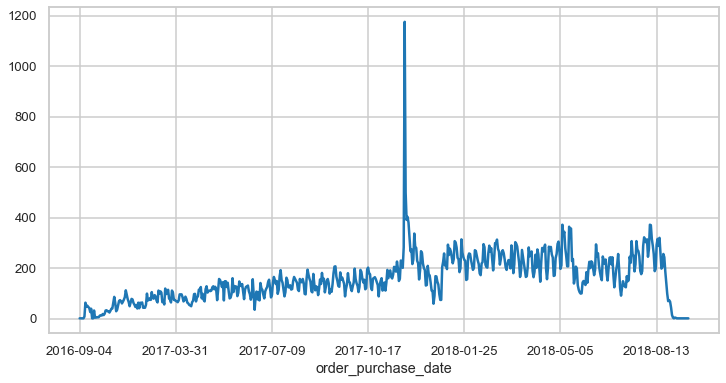

In [33]:
# order count over time
df_olist.groupby(["order_purchase_date"])["order_id"].nunique().plot()
plt.show()

### Orders by day name

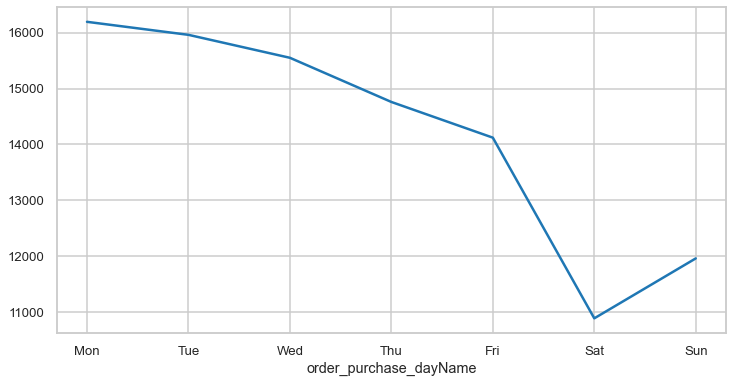

In [34]:
# order count by day name
df_olist.groupby(["order_purchase_dayName"])["order_id"].nunique().plot()
plt.show()

### Orders by month name

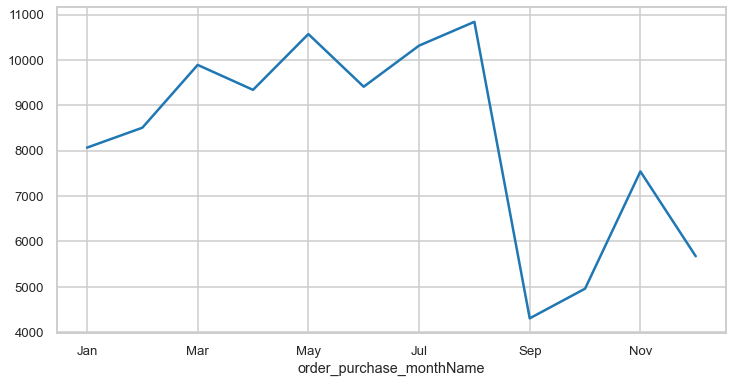

In [35]:
# order count by month name
df_olist.groupby(["order_purchase_monthName"])["order_id"].nunique().plot()
plt.show()

### Orders by product category

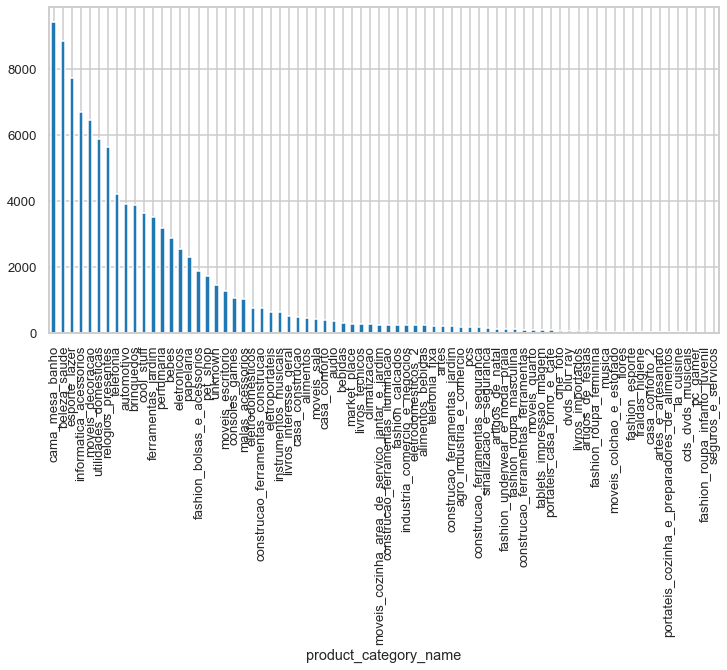

In [36]:
# order count by product category
df_olist.groupby("product_category_name")["order_id"].nunique().sort_values(ascending = False).plot.bar()
plt.show()

### Orders by state

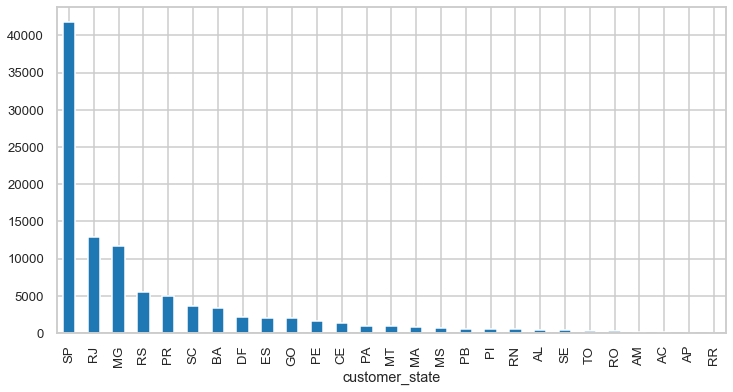

In [37]:
# order count by state
df_olist.groupby("customer_state")["order_id"].nunique().sort_values(ascending = False).plot.bar()
plt.show()

#### By value

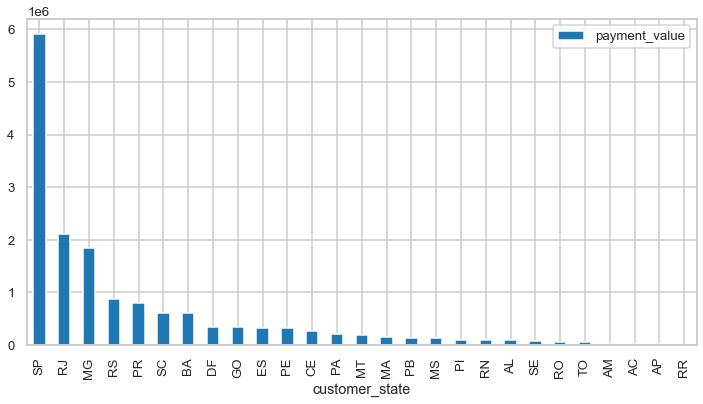

In [38]:
# sum of order payment value by state
df_olist.groupby(["customer_state", "order_id"])["payment_value"].mean().reset_index().groupby("customer_state").sum().sort_values("payment_value", ascending = False).plot.bar()
plt.show()


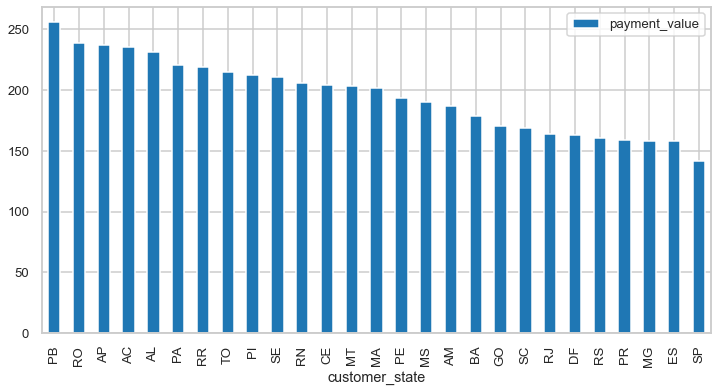

In [39]:
# mean of order payment value by state
df_olist.groupby(["customer_state", "order_id"])["payment_value"].mean().reset_index().groupby("customer_state").mean().sort_values("payment_value", ascending = False).plot.bar()
plt.show()

#### Most freq product category

In [40]:
# most frequent product category by state
df_olist.groupby("customer_state")["product_category_name"].value_counts().groupby("customer_state").head(1)

customer_state  product_category_name
AC              moveis_decoracao           12
AL              beleza_saude               68
AM              beleza_saude               21
AP              beleza_saude               10
BA              beleza_saude              395
CE              beleza_saude              175
DF              beleza_saude              252
ES              cama_mesa_banho           243
GO              cama_mesa_banho           256
MA              beleza_saude               91
MG              cama_mesa_banho          1421
MS              esporte_lazer              82
MT              beleza_saude               92
PA              beleza_saude              110
PB              beleza_saude               84
PE              beleza_saude              242
PI              beleza_saude               57
PR              moveis_decoracao          541
RJ              cama_mesa_banho          1797
RN              beleza_saude               68
RO              beleza_saude              

### Order Payment  types and installments

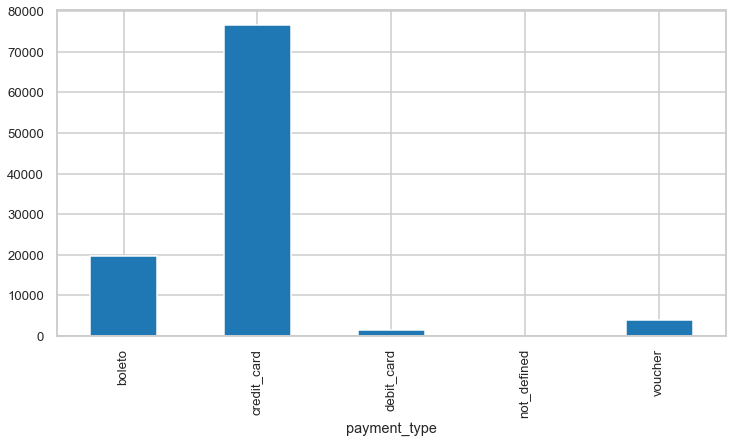

In [41]:
# order count by payment types
df_olist.groupby("payment_type")["order_id"].nunique().plot.bar()
plt.show()

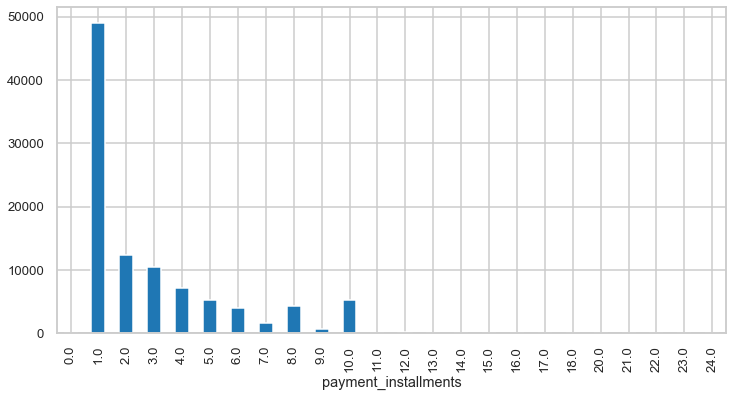

In [42]:
# order count by payment installments
df_olist.groupby("payment_installments")["order_id"].nunique().plot.bar()
plt.show()

### Order Delivery Status

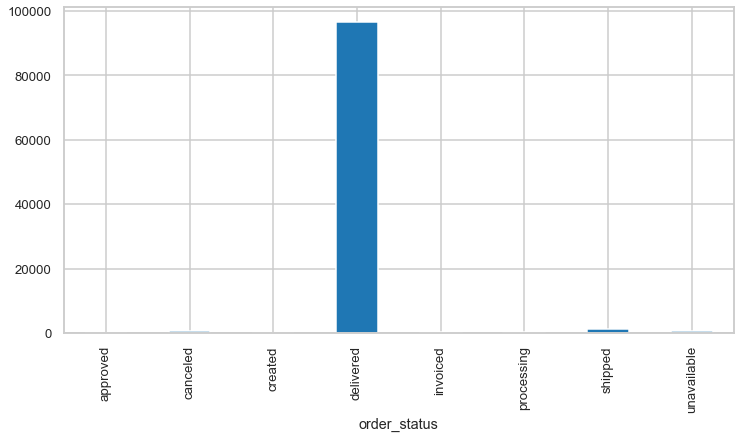

In [43]:
# order count by delivery status
df_olist.groupby("order_status")["order_id"].nunique().plot.bar()
plt.show()

## Customers

### Customers by state

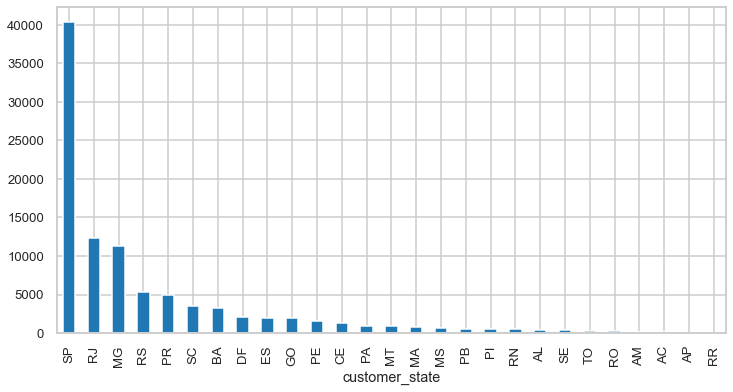

In [44]:
# customer count by state
df_olist.groupby("customer_state")["customer_unique_id"].nunique().sort_values(ascending = False).plot.bar()
plt.show()

#### By city within top states

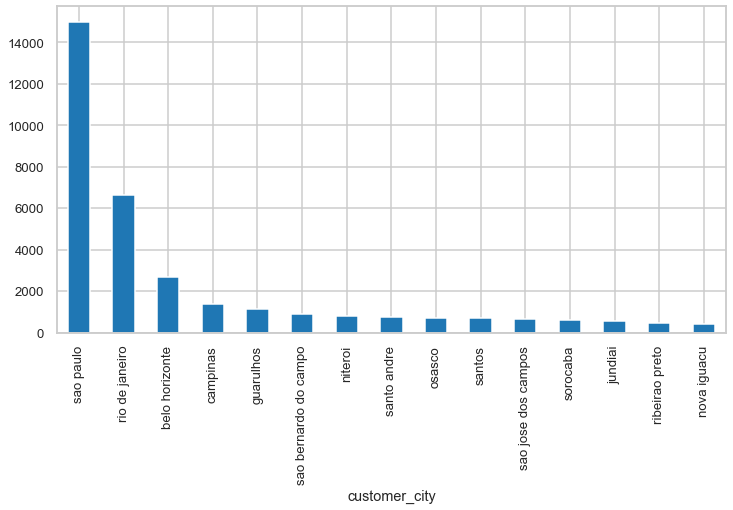

In [45]:
# customer count by city within top 3 states
filt = (df_olist["customer_state"] == 'SP') |  (df_olist["customer_state"]== 'RJ') |  (df_olist["customer_state"]== 'MG')

df_olist.loc[filt].groupby('customer_city')['customer_unique_id'].nunique().nlargest(15).plot.bar()
plt.show()


### New customers by year

In [46]:
# create dataframe for unique customer id and first purchase
df_customers_unique = pd.DataFrame(df_olist.groupby(["customer_unique_id"])["order_purchase_timestamp"].min()).reset_index()
df_customers_unique.columns = ["customer_unique_id", "first_purchase"]

In [47]:
# get year, month and year month of first purchase
df_customers_unique["order_purchase_year"] = df_customers_unique["first_purchase"].apply(lambda x: x.strftime("%Y"))
df_customers_unique["order_purchase_month"] = df_customers_unique["first_purchase"].apply(lambda x: x.strftime("%b"))

df_customers_unique["order_purchase_yearMonth"] = df_customers_unique["order_purchase_year"] + " " + df_customers_unique["order_purchase_month"]

In [48]:
df_customers_unique.head()

,customer_unique_id,first_purchase,order_purchase_year,order_purchase_month,order_purchase_yearMonth
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018,May,2018 May
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018,May,2018 May
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017,Mar,2017 Mar
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017,Oct,2017 Oct
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017,Nov,2017 Nov


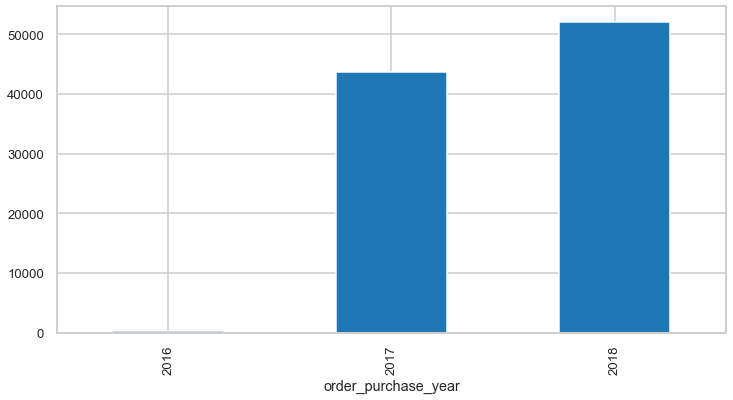

In [49]:
# new customers by year
df_customers_unique.groupby("order_purchase_year")["first_purchase"].count().plot.bar()
plt.show()

### New customers by year month

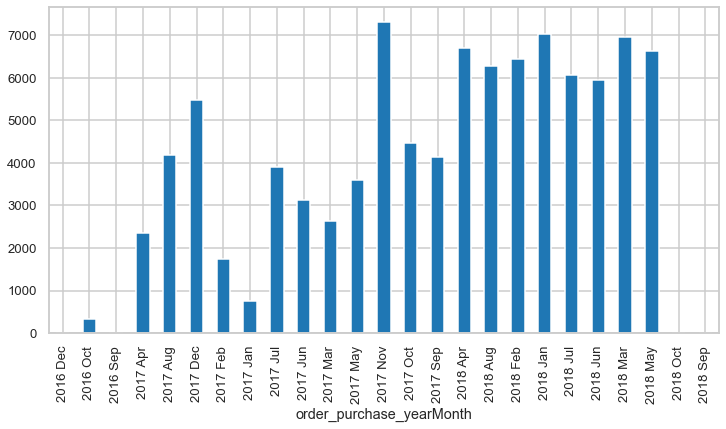

In [50]:
# new customers by year month
df_customers_unique.groupby("order_purchase_yearMonth")["first_purchase"].count().plot.bar()
plt.show()

## Rating

In [51]:
# distribution of order rating
df_olist.groupby(["order_id"])["review_score"].mean()

order_id
00010242fe8c5a6d1ba2dd792cb16214    5.0
00018f77f2f0320c557190d7a144bdd3    4.0
000229ec398224ef6ca0657da4fc703e    5.0
00024acbcdf0a6daa1e931b038114c75    4.0
00042b26cf59d7ce69dfabb4e55b4fd9    5.0
                                   ... 
fffc94f6ce00a00581880bf54a75a037    5.0
fffcd46ef2263f404302a634eb57f7eb    5.0
fffce4705a9662cd70adb13d4a31832d    5.0
fffe18544ffabc95dfada21779c9644f    5.0
fffe41c64501cc87c801fd61db3f6244    5.0
Name: review_score, Length: 99441, dtype: float64

### By day name

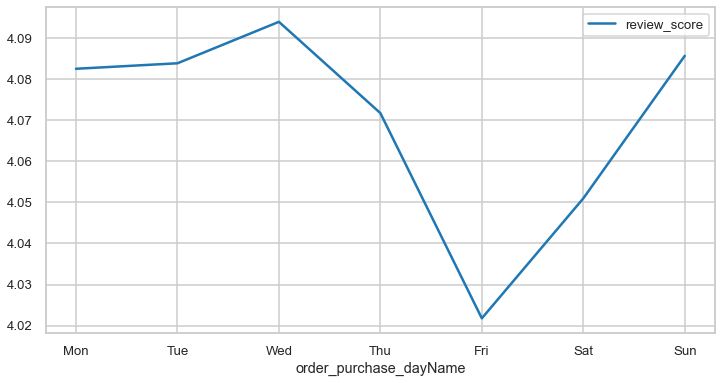

In [52]:
# mean of order rating by day name
df_olist.groupby(["order_purchase_dayName", "order_id"])["review_score"].mean().reset_index().groupby("order_purchase_dayName").mean().plot()
plt.show()


### By Month name

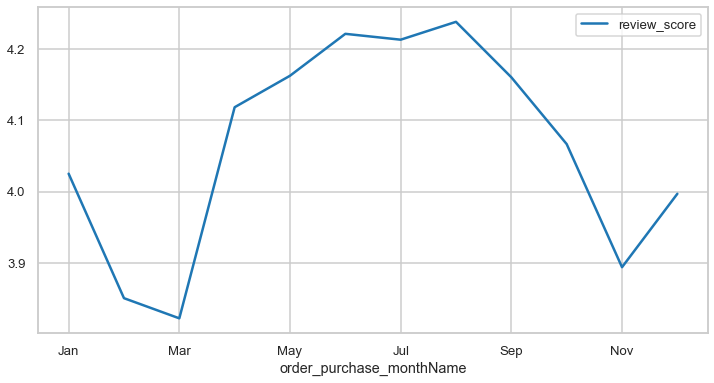

In [53]:
# mean of order rating by month name
df_olist.groupby(["order_purchase_monthName", "order_id"])["review_score"].mean().reset_index().groupby("order_purchase_monthName").mean().plot()
plt.show()

### By estimated delivery name

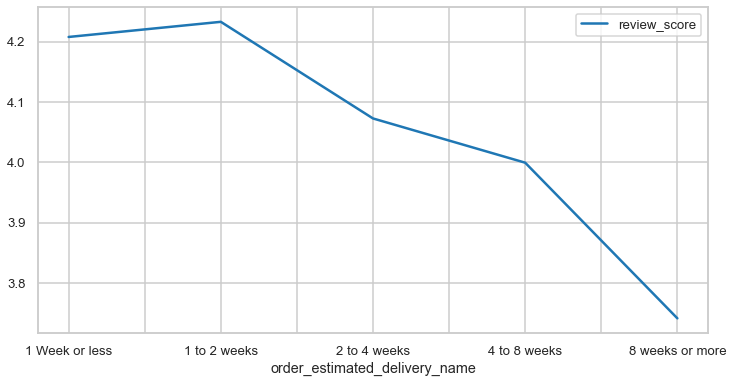

In [54]:
# mean of order rating by estimated delivery time name
df_olist.groupby(["order_estimated_delivery_name", "order_id"])["review_score"].mean().reset_index().groupby("order_estimated_delivery_name").mean().plot()
plt.show()

# Recommender system

## Non-personal Reccomender

### Model-based collaborative filtering

A model-based collaborative filtering system recommends items to users based on their purchasing history and the similarity of ratings given by other users who purchased similar items. Here, a model-based collaborative filtering technique is chosen because it aids in product prediction for a specific user by detecting trends based on preferences from multiple user data.  This method uses a utility matrix that consists of all possible user-item preferences, in our case ratings, represented as a matrix. 

In [55]:
#creating the utility matrix from ratings
ratings_utility_matrix = df_olist.pivot_table(values='review_score', index='customer_unique_id', columns='product_category_name_english', fill_value=0)

In [56]:
#transpose the matrix
ratings_utility_matrix = ratings_utility_matrix.T

In [57]:
#Import relevant packages and tools
from surprise import SVD
from surprise.dataset import Reader, Dataset

import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(ratings_utility_matrix)
decomposed_matrix.shape

(72, 10)

In [58]:
correlation_matrix = np.corrcoef(decomposed_matrix)
# lets look at the shape
correlation_matrix.shape

(72, 72)

Let's take a look at the variables with the most ratings and the lowest before we make predictions

In [59]:
df_olist.groupby('product_category_name_english')['review_score'].count().nlargest(10)

product_category_name_english
bed_bath_table           11990
health_beauty            10033
sports_leisure            9005
furniture_decor           8833
computers_accessories     8151
housewares                7380
watches_gifts             6213
telephony                 4726
garden_tools              4590
auto                      4400
Name: review_score, dtype: int64

In [60]:
df_olist.groupby('product_category_name_english')['review_score'].count().nsmallest(10)

product_category_name_english
security_and_services         2
fashion_childrens_clothes     8
cds_dvds_musicals            14
la_cuisine                   16
arts_and_craftmanship        24
fashion_sport                31
home_comfort_2               31
flowers                      33
diapers_and_hygiene          39
music                        40
Name: review_score, dtype: int64

We see that there are variables with lot of ratings and also variables with very few. To prevent bias, we explore both groups and compare and discuss the results.


In [61]:
# top 5 ratings
category_one = "bed_bath_table"
category_two = "computers_accessories"
# bottom 5 ratings
category_three = "flowers"
category_four = "fashion_childrens_clothes"

In [62]:
# create indexes for the groups
product_names = list(ratings_utility_matrix.index)
# defining each category for the recommendation
category_one_index = product_names.index(category_one)
category_two_index = product_names.index(category_two)
category_three_index = product_names.index(category_three)
category_four_index = product_names.index(category_four)

In [63]:
correlated_categories_one = correlation_matrix[category_one_index]
correlated_categories_two = correlation_matrix[category_two_index]
correlated_categories_three = correlation_matrix[category_three_index]
correlated_categories_four = correlation_matrix[category_four_index]

Recommendation for the top highly correlated products in sequence, we set the correlation factor to 0,9. Therefore we only display variables with higher correlation.

In [64]:
# Most rating variable 1 : "bed_bath_table"

recommend_one = list(ratings_utility_matrix.index[correlated_categories_one > 0.9])
# Removes the item already bought by the customer
recommend_one.remove(category_one) 
recommend_one


['furniture_mattress_and_upholstery', 'home_confort']

In [65]:
# Most rating variable 2 : "computers_accessories"

recommend_two = list(ratings_utility_matrix.index[correlated_categories_two > 0.9])
# Removes the item already bought by the customer
recommend_two.remove(category_two) 
recommend_two

['music']

In [66]:
# Bottom variable 1 : "flowers"

recommend_three = list(ratings_utility_matrix.index[correlated_categories_three > 0.9])
# Removes the item already bought by the customer
recommend_three.remove(category_three) 
recommend_three

['art',
 'construction_tools_lights',
 'furniture_decor',
 'home_construction',
 'industry_commerce_and_business']

In [67]:
# Bottom variable 2 : "fashion_childrens_clothes"

recommend_four = list(ratings_utility_matrix.index[correlated_categories_four > 0.9])
# Removes the item already bought by the customer
recommend_four.remove(category_four) 
recommend_four

['baby',
 'musical_instruments',
 'small_appliances_home_oven_and_coffee',
 'toys']

From the recommendations above, it is seen that only similar categories are recommended for each chosen reference category. The recommendations are not based on the users purchase history nor his behavior, but on purchase history of other users who have already purchased a product within this category. 

This is therefore a viable option for a recommender system for a company like olist. It is fairly simple to implement and easily scalable.


## Personal Recommender

The current database is too large, so we narrow the analysis by looking at only customers that buy more than twice




In [68]:
df6 = df_olist.iloc[:, :]
count_freq = dict(df6['customer_unique_id'].value_counts())
df6['count_freq'] = df6['customer_unique_id']
df6['count_freq'] = df6['count_freq'].map(count_freq)
df7 = df6[df6['count_freq'] > 2]

print(len(df7))

16452


We use dummy variables to put the categories as columns. Instead of having zero or one for every product, we insert the customer review score, and drop that column. The best way to do that is to multiply the rating into the columns to get the data frame in the right format to process further.

In [69]:
df8 = df7[['customer_unique_id', 'review_score','product_category_name_english']].copy()
#Create dummie variables on products
category_columns = ['product_category_name_english']

for col in category_columns:
    df8[col] = df8[col].astype('category')   
dataset = pd.get_dummies(df8, columns=category_columns, drop_first=True)
names = list(dataset.columns)
names_1 = names[2:68]
names_1

#multiply the ratings into the columns
dataset[names_1] = dataset[names_1].multiply(dataset["review_score"], axis="index")




In [70]:
#drop review score, as we don't need it any more
dataset = dataset.drop(['review_score'], axis=1)

In [71]:
#store databases for test/train, and for other analysis
dataset1 = dataset
train_all = dataset

### All  Product Categories

There are 68 different product categories in the database. We will try to generate recommender system by using all the variables, but due to many zero/nans values it will be a challenge.

Every purchase from customer is grouped into one row and the ratings from the customer are averaged if he has bought the item twice or more. In other words, customer appears only in one row and his rating history.

In [72]:
# we don't want to have zero values when we use the mean function, therefore we change zero to nans here
dataset= dataset.replace(0, np.nan)

# group every customers and avarege the ratings
dataset =dataset.groupby('customer_unique_id').mean()




#### User-User

We start by trying to implement user-user collaborative filtering, by other words, provid recommendation based on tastes of other users similar to the customer we look at. This method might not work as we need a lot of information about other people  in the database to provide sufficent recommendation.

Due to many nans values we have to change them to zeros, to be able to create functional correlation matrix. The pandas' function `corr()` offers the option of ignoring missing values and can find overlapping ratings sets. That's not possible with our dataset because we have so many missing values. 




In [73]:
dataset_all = dataset
#changes nans to zeros
dataset_all = dataset_all.replace(np.nan,0)
dataset_all2 = dataset_all

#corelation matrix
correlations_all = dataset_all2.transpose().corr()


We pick a random customer from our database, and create recommendation for him, based on his purchases and similar customers

In [74]:
from sklearn.linear_model import LogisticRegression
# First we find 5 neighbors
K = 5
# we pick random customer, this one sounds good
user_id = 'a1874c5550d2f0bc14cc122164603713'

In [75]:
# selecting K neighbors 
neighbours_corr = correlations_all[user_id].sort_values(ascending=False)[1: K+1]

#top 5 similar customers
neighbours_corr

customer_unique_id
e53fd5575f1418397aae732c5755b6fc    0.788756
e53821a413d5b137cd9005b41f09dfe0    0.592885
6594a65023bcb47539aa91b0f8e98e00    0.588662
b2664990a1ac9e250d98ff5c615c3276    0.569467
084d29b95577d79bd5ce9019727daa66    0.553618
Name: a1874c5550d2f0bc14cc122164603713, dtype: float64

Next we plot the correlation for our dataset, it supports our arguement regarding the missing values(zeros/nans)

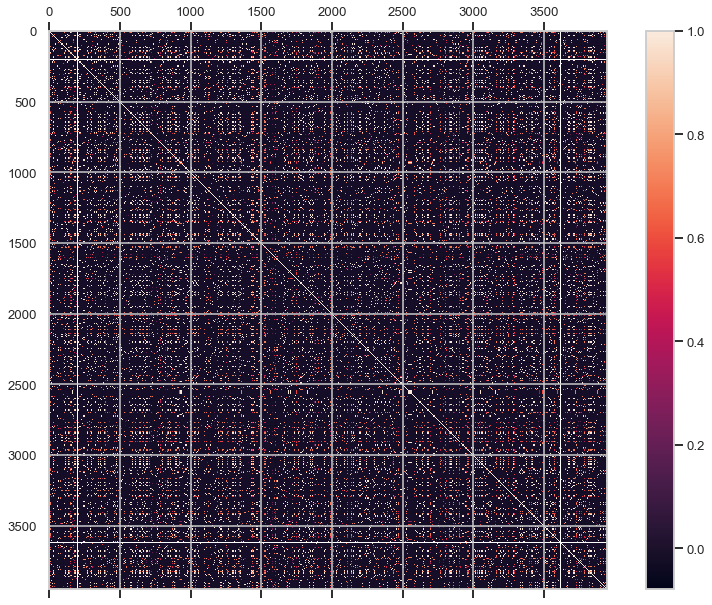

In [76]:
neighbours_ratings = dataset_all2.loc[neighbours_corr.index]

#correlation matrix

import matplotlib.pyplot as plt
%matplotlib inline

f = plt.figure(figsize=(14, 10))
plt.matshow(correlations_all, fignum=f.number)
#plt.xticks(range(correlations_all.shape[1]), correlations_all.columns, fontsize=14, rotation=45)
#plt.yticks(range(correlations_all.shape[1]), correlations_all.columns, fontsize=14)
cb = plt.colorbar()



We look at some categories that have missing rating values from the customer we picked above. We will try to recommend 5 categories to him.

In [77]:
# Change zeros to nan to be able to identify missing values
dataset_all3= dataset_all2.replace(0, np.nan)

# Find a list of missing values for the random customer
missing_ratings = dataset_all3.loc[user_id]
missing_ratings = missing_ratings[missing_ratings.isnull()]
missing_ratings

product_category_name_english_air_conditioning         NaN
product_category_name_english_art                      NaN
product_category_name_english_arts_and_craftmanship    NaN
product_category_name_english_audio                    NaN
product_category_name_english_auto                     NaN
                                                        ..
product_category_name_english_stationery               NaN
product_category_name_english_tablets_printing_image   NaN
product_category_name_english_toys                     NaN
product_category_name_english_unknown                  NaN
product_category_name_english_watches_gifts            NaN
Name: a1874c5550d2f0bc14cc122164603713, Length: 65, dtype: float64

Top 5 categories to recommend to the customer

In [78]:
# make top 5 predictions for the categories with missing values for the specifed customer

user_mean = dataset_all2.loc[user_id].mean()
neighbours_means = neighbours_ratings.mean(axis=1)
for category_name, val in missing_ratings.iteritems():
    rating = 0
    weights_sum = 0
    for neighbour_id, row in neighbours_ratings.iterrows():
        if np.isnan(row[category_name]): continue
        rating += neighbours_corr.loc[neighbour_id] * (row[category_name] - neighbours_means.loc[neighbour_id])
        weights_sum += abs(neighbours_corr.loc[neighbour_id])
    if weights_sum > 0:
        rating /= weights_sum
    rating += user_mean
    missing_ratings.at[category_name] = rating
missing_ratings.sort_values(ascending=False)[0:5]

product_category_name_english_watches_gifts                0.149732
product_category_name_english_fashion_underwear_beach      0.149732
product_category_name_english_fashion_shoes                0.149732
product_category_name_english_fashion_male_clothing        0.149732
product_category_name_english_fashion_childrens_clothes    0.149732
Name: a1874c5550d2f0bc14cc122164603713, dtype: float64

We see that we get terrible results, as we expected, but Item-Item offers more potentials to our database, let's try that.

#### Item-Item

Now we try item-item collaborative filtering by providing a recommendation based on other items similar to the particular customer. The advance of using item-item method is that it usually need much fewer similarity computations.




In [79]:
K = 5
user_id = 'a1874c5550d2f0bc14cc122164603713'

dataset_all4= dataset_all3.replace(np.nan,0)

correlations = dataset_all4.corr()


In [80]:
for product_name, val in missing_ratings.iteritems():
    rating = 0
    weights_sum = 0
    neighbours_corr = correlations[product_name].sort_values(ascending=False)[1: K+1]
    item_mean = dataset_all4[product_name].mean()
    neighbours_ratings = dataset_all4[neighbours_corr.index].transpose()
    neighbours_means = neighbours_ratings.mean(axis=1)
    for neighbour_id, row in neighbours_ratings.iterrows():
        if np.isnan(row[user_id]): continue
        rating += neighbours_corr[neighbour_id] * (row[user_id] - neighbours_means[neighbour_id])
        weights_sum += abs(neighbours_corr[neighbour_id])
    if weights_sum > 0:
        rating /= weights_sum
    rating += item_mean
    missing_ratings.at[product_name] = rating
missing_ratings.sort_values(ascending=False)[0:5]

product_category_name_english_dvds_blu_ray                               1.848700
product_category_name_english_food                                       1.708224
product_category_name_english_audio                                      1.197193
product_category_name_english_costruction_tools_garden                   0.996845
product_category_name_english_kitchen_dining_laundry_garden_furniture    0.980548
Name: a1874c5550d2f0bc14cc122164603713, dtype: float64

It can be clearly seen that, Item-Item method is more effective for our dataset when it comes downs to create recommendations as it needs fewer similarity computations.

#### Matrix Factorization

Next we will use matrix factorization techniques, they often improve system by dramatically reducing the necessary amount of space. We use the same customer as we did above.  


In [81]:
from surprise import SVD
from surprise.dataset import Reader, Dataset


user_ids, product_ids, ratings = [], [], []
#
for user_id, row in dataset_all4.iterrows():
    for product_id in dataset_all4.columns:
        rating = row[product_id]
        if not np.isnan(rating):
            user_ids.append(user_id)
            product_ids.append(product_id)
            ratings.append(rating)
ratings_df = pd.DataFrame({'userID':user_ids, 'productID':product_ids, 'rating':ratings})
ratings_df = ratings_df[['userID', 'productID', 'rating']] # correct order

In [82]:
reader = Reader(rating_scale=(0.5, 5.0))
data_surprise = Dataset.load_from_df(ratings_df, reader)
data_train_surprise = data_surprise.build_full_trainset() # use the whole training set

n_factors = 15
lr_all = 0.005 # default value
reg_all = 0.02 # default value
#
model = SVD(n_factors=n_factors, lr_all=lr_all, reg_all=reg_all)
model.fit(data_train_surprise)

In [83]:
#dataset_all5 = dataset_all4.replace(0, np.nan)

user_id = 'a1874c5550d2f0bc14cc122164603713'
missing_categories_ids = dataset_all4[dataset_all4.isna()].loc[user_id].index
#
recommendations = []
for product_id in missing_categories_ids:
    r = model.predict(user_id, product_id, verbose=False).est
    recommendations.append((product_id, r))
    #print(product_id)
    #break
recommendations.sort(reverse=True, key=lambda x: x[1])
recommendations[:5]



[('product_category_name_english_housewares', 1.0676741784924058),
 ('product_category_name_english_garden_tools', 0.9652923747698581),
 ('product_category_name_english_sports_leisure', 0.7961796354297561),
 ('product_category_name_english_air_conditioning', 0.5),
 ('product_category_name_english_art', 0.5)]

Here we get completly different results from the previous algorithms. To estimate performance of the different approaches, we will split the data, train/test, and use couple of models to see which method is performing best. 


#### Model: train/test

Train/test 

We will split the data 70/30 and use baseline models for estimating on the training set and calculate RMSE for the testing set for each baseline model. 

We will use these baseline models:
1. Global mean
2. User's mean
3. Movie's mean
4. Global + deviation of user + deviation of the movie

We will then compare the results from the baselines with singular value decomposition model (SVD).



In [84]:
# Fitting the data for the model analysis

dataset_all_train = train_all
dataset_all_train = dataset_all_train.set_index('customer_unique_id')
dataset_all_train= dataset_all_train.replace(0, np.nan)



In [85]:
#Get the data on the correct format for train and test split

user_ids, products_ids, ratings = [], [], []
#
for user_id, row in dataset_all_train.iterrows():
    #print(row)
    for product_id in dataset_all_train.columns:
        #print(product_id, user_id)
        rating = row[product_id]
        if not np.isnan(rating):
            #print(product_id, user_id, row[product_id])
            user_ids.append(user_id)
            products_ids.append(product_id)
            ratings.append(rating)
ratings_df = pd.DataFrame({'userID':user_ids, 'ProductID':products_ids, 'rating':ratings})
ratings_df = ratings_df[['userID', 'ProductID', 'rating']] # correct order
ratings_df

,userID,ProductID,rating
0,7c396fd4830fd04220f754e42b4e5bff,product_category_name_english_housewares,4.0
1,7c396fd4830fd04220f754e42b4e5bff,product_category_name_english_housewares,4.0
2,7c396fd4830fd04220f754e42b4e5bff,product_category_name_english_housewares,4.0
3,634f09f6075fe9032e6c19609ffe995a,product_category_name_english_telephony,4.0
4,634f09f6075fe9032e6c19609ffe995a,product_category_name_english_telephony,4.0
...,...,...,...
16293,888af42530e7523201a4326273a7b35c,product_category_name_english_housewares,4.0
16294,c716cf2b5b86fb24257cffe9e7969df8,product_category_name_english_toys,1.0
16295,c716cf2b5b86fb24257cffe9e7969df8,product_category_name_english_toys,1.0
16296,c716cf2b5b86fb24257cffe9e7969df8,product_category_name_english_toys,1.0


Due to the fact that the computer cannot handle the entire database, we take a sample of 500 customer for our analysis.

In [86]:
# sample size
ratings_df = ratings_df[0:250]



In [87]:
# splitting

train_ind, test_ind = [], []
for product_id in ratings_df['ProductID'].unique():
    rows = ratings_df[ratings_df['ProductID'] == product_id]
    ind = rows.index[:2].values.tolist()
    train_ind += ind
#
c = 0.7
b = len(train_ind) / len(ratings_df)
a = (c - b) / (1 - b)
print(a)


0.6249999999999999


In [88]:
#creating the train and test databases

all_ind = set(range(len(ratings_df)))
not_used = list(all_ind - set(train_ind))
not_done = True
np.random.seed(50)
while not_done:
    np.random.shuffle(not_used)
    train_ind_ = train_ind + not_used[:int(a * len(not_used))]
    df_train = ratings_df.loc[train_ind_]
    if ratings_df.nunique()['ProductID'] == df_train.nunique()['ProductID'] and ratings_df.nunique()['userID'] == df_train.nunique()['userID']:
        not_done = False
        train_ind = train_ind_
#
test_ind = list(all_ind - set(train_ind))
#
train_ind = sorted(train_ind)
test_ind = sorted(test_ind)

In [89]:
df_train = ratings_df.iloc[train_ind]
df_test = ratings_df.iloc[test_ind]

#defining the RMSE function
def RMSE(y_true, y_pred):
    return np.linalg.norm(y_true - y_pred) / np.sqrt(len(y_true))

#defining boxplot function to analyse the model results
def MakeBoxplot(y_true, y_pred, title):
    data = [y_pred[y_true == (x*0.5+0.5)] for x in range(10)]
    fig = plt.figure(figsize=(5, 5))
    plt.boxplot(data)
    min_a, max_a = 0., 5.5
    plt.xlim((min_a, max_a))
    plt.ylim((min_a, max_a))
    plt.plot([min_a, max_a * 2], [min_a, max_a], ls='--', color='gray', linewidth=1.0)
    plt.xticks(range(12), [x*0.5 for x in range(12)])
    plt.xlabel('True Rating')
    plt.ylabel('Predicted Rating')
    plt.title(title)
    plt.show()



In [90]:
y_true = df_test['rating'].values

RMSE = 1.5793638613665295


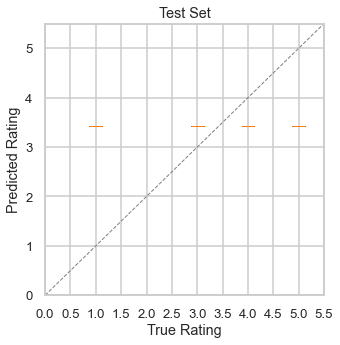

In [91]:
# global mean
global_mean = df_train['rating'].mean()
# prediction
y_pred = []
for i, row in df_test.iterrows():
    y_pred.append(global_mean)
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# or simply y_pred = np.array([global_mean for i in range(len(y_true))])
# performance
error1 = RMSE(y_true, y_pred)
print("RMSE =", error1)
MakeBoxplot(y_true, y_pred, 'Test Set')

RMSE = 0.4866642633922875


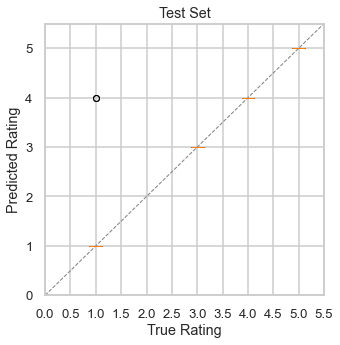

In [92]:
# user mean
user_mean = df_train.groupby('userID')['rating'].mean()
# prediction
y_pred = []
for i, row in df_test.iterrows():
    y_pred.append(user_mean[row['userID']])
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error2 = RMSE(y_true, y_pred)
print("RMSE =", error2)
MakeBoxplot(y_true, y_pred, 'Test Set')

RMSE = 1.5066578980127778


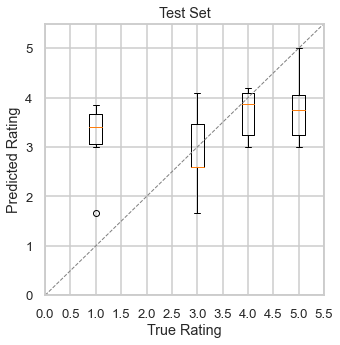

In [93]:
# product mean
product_mean = df_train.groupby('ProductID')['rating'].mean()
# prediction
y_pred = []
for i, row in df_test.iterrows():
    y_pred.append(product_mean[row['ProductID']])
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error3 = RMSE(y_true, y_pred)
print("RMSE =", error3)
MakeBoxplot(y_true, y_pred, 'Test Set')

RMSE = 0.6767444531554628


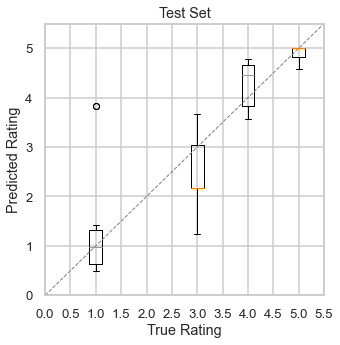

In [94]:
# Combined model
# prediction
y_pred = []
for i, row in df_test.iterrows():
    r = user_mean[row['userID']] + product_mean[row['ProductID']] - global_mean
    y_pred.append(r)
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error4 = RMSE(y_true, y_pred)
print("RMSE =", error4)
MakeBoxplot(y_true, y_pred, 'Test Set')

0,358 RMSE, not so bad, can we beat it with SVD method? 

In [95]:
# import packages and read the data
from surprise import SVD
from surprise.dataset import Reader, Dataset


reader = Reader(rating_scale=(0.5, 5.0))
data_surprise = Dataset.load_from_df(df_train, reader)

In [96]:
from surprise.model_selection import GridSearchCV

In [97]:
param_grid = {
    #'n_epochs': [20], 
    #'lr_all': [0.005, 0.05],
    'reg_all': [0.01, 0.1], 
    'n_factors': [10, 25, 50],
    #'biased': [True, False]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data_surprise)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.3511702775719625
{'reg_all': 0.01, 'n_factors': 50}


In [98]:
model = gs.best_estimator['rmse']
model.fit(data_surprise.build_full_trainset())

In [99]:
user_ids_true = df_test['userID'].values
product_ids_true = df_test['ProductID'].values

RMSE = 1.012306646527686


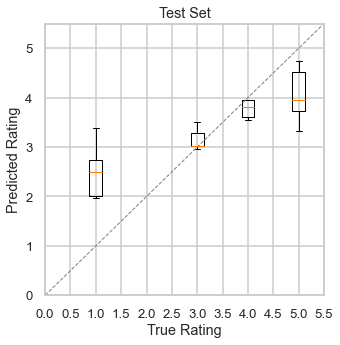

In [100]:
y_pred = []
for user_id, product_id in zip(user_ids_true, product_ids_true):
    r = model.predict(user_id, product_id, verbose=False).est
    y_pred.append(r)
y_pred = np.array(y_pred)
# performance
error5 = RMSE(y_true, y_pred)
print("RMSE =", error5)
MakeBoxplot(y_true, y_pred, 'Test Set')

The combined model (RMSE = 0,358) outperformes the SVD model (RMSE = 0,55)

### Reduced Product Categories

To address the problem having many zeros/nans values, can we get better results by categorizing the products into product categories? By combining many similar categories together, we will get fewer zeros/nans and we might be able to create better recommendation. We will do the same analysis as we did above, but now with adjusted dataset.

#### Identifying the new categories

In [101]:
dataset1[names_1] = dataset1[names_1].replace({ 0:np.nan})


In [102]:
col = dataset1.loc[: , ['product_category_name_english_air_conditioning',
'product_category_name_english_audio',
'product_category_name_english_computers',
'product_category_name_english_computers_accessories',
'product_category_name_english_consoles_games',
'product_category_name_english_dvds_blu_ray',
'product_category_name_english_electronics',
'product_category_name_english_tablets_printing_image',
'product_category_name_english_telephony',
'product_category_name_english_fixed_telephony']
]

dataset1['technology'] = col.mean(axis=1)




col2 = dataset1.loc[: , ['product_category_name_english_diapers_and_hygiene',
'product_category_name_english_baby',
'product_category_name_english_bed_bath_table',
'product_category_name_english_books_general_interest',
'product_category_name_english_books_technical',
'product_category_name_english_christmas_supplies',
'product_category_name_english_cine_photo',
'product_category_name_english_furniture_bedroom',
'product_category_name_english_furniture_decor',
'product_category_name_english_furniture_living_room',
'product_category_name_english_furniture_mattress_and_upholstery',
'product_category_name_english_home_appliances',
'product_category_name_english_home_appliances_2',
'product_category_name_english_home_comfort_2',
'product_category_name_english_home_confort',
'product_category_name_english_home_construction',
'product_category_name_english_housewares',
'product_category_name_english_kitchen_dining_laundry_garden_furniture',
'product_category_name_english_la_cuisine',
'product_category_name_english_office_furniture',
]]

dataset1['home_and_family'] = col2.mean(axis=1)

col3 = dataset1.loc[: , ['product_category_name_english_construction_tools_construction',
'product_category_name_english_construction_tools_lights',
'product_category_name_english_construction_tools_safety',
'product_category_name_english_costruction_tools_garden',
'product_category_name_english_costruction_tools_tools',
'product_category_name_english_garden_tools',
]]

dataset1['construction_and_garden'] = col3.mean(axis=1)

col4 = dataset1.loc[: , ['product_category_name_english_fashio_female_clothing',
'product_category_name_english_fashion_bags_accessories',
'product_category_name_english_fashion_childrens_clothes',
'product_category_name_english_fashion_male_clothing',
'product_category_name_english_fashion_shoes',
'product_category_name_english_fashion_sport',
'product_category_name_english_fashion_underwear_beach',
]]

dataset1['fashion'] = col4.mean(axis=1)

col5 = dataset1.loc[: , ['product_category_name_english_food',
'product_category_name_english_food_drink',
'product_category_name_english_drinks',
]]

dataset1['food_and_drink'] = col5.mean(axis=1)

col6 = dataset1.loc[: , ['product_category_name_english_cool_stuff',
'product_category_name_english_flowers',
'product_category_name_english_toys',
'product_category_name_english_watches_gifts',
'product_category_name_english_party_supplies',
'product_category_name_english_pet_shop',
]]

dataset1['fun_and_gifts'] = col6.mean(axis=1)

col7 = dataset1.loc[: , ['product_category_name_english_health_beauty',
'product_category_name_english_perfumery',
]]

dataset1['selfcare'] = col7.mean(axis=1)


col1 = dataset1.loc[: , ['product_category_name_english_industry_commerce_and_business',
'product_category_name_english_luggage_accessories',
'product_category_name_english_auto',
'product_category_name_english_market_place',
'product_category_name_english_signaling_and_security',
'product_category_name_english_small_appliances',
'product_category_name_english_sports_leisure',
'product_category_name_english_stationery',
'product_category_name_english_art',
'product_category_name_english_arts_and_craftmanship',
'product_category_name_english_music',
'product_category_name_english_musical_instruments']]

dataset1['others'] = col1.mean(axis=1)

In [103]:
dataset_cat = dataset1[['customer_unique_id', 'technology','home_and_family','construction_and_garden', 'fashion', 'food_and_drink', 
               'fun_and_gifts', 'selfcare','others']].copy()

# we put zeros instead of nans, to get better correlation matrix, we have so many nans/zeros, if we use nans, we get bad results

#store database
train_cat = dataset_cat

In [104]:
dataset_cat1=dataset_cat.groupby('customer_unique_id').mean()

In [105]:
dataset_cat1 = dataset_cat1.fillna(0)

We want to maximize the efficiency of our recommendation system, therefore we take a sample of customers with more than 35% ratings of the whole categories or less than 65% zero values.

In [106]:
dataset_cat2 = dataset_cat1[dataset_cat1.astype('bool').mean(axis=1)>=0.35] # or df[(~df.astype('bool')).mean(axis=1)<0.75]

#### User-User 

We will use the same customer as we used above.


In [107]:
correlations_cat = dataset_cat2.transpose().corr()

In [108]:
from sklearn.linear_model import LogisticRegression
# We want to find 5 neighbors
K = 5
# we pick random customer
user_id = 'a1874c5550d2f0bc14cc122164603713'


In [109]:
# selecting K neighbors 
neighbours_corr = correlations_cat[user_id].sort_values(ascending=False)[1: K+1]
neighbours_corr

customer_unique_id
bbf65e7823171a84e70a495dd6c34ceb    0.961959
acaf5177d6de60fda7ce77c48abb5230    0.678878
9077449283dc1319d5e51fb3159b28e2    0.627364
74cb1ad7e6d5674325c1f99b5ea30d82    0.627364
efce1ab3e96ccab8b1b464326bd22417    0.404301
Name: a1874c5550d2f0bc14cc122164603713, dtype: float64

In [110]:
neighbours_ratings = dataset_cat2.loc[neighbours_corr.index]

We see our correlation matrix has much better colours now and hopefully we can create better insights.

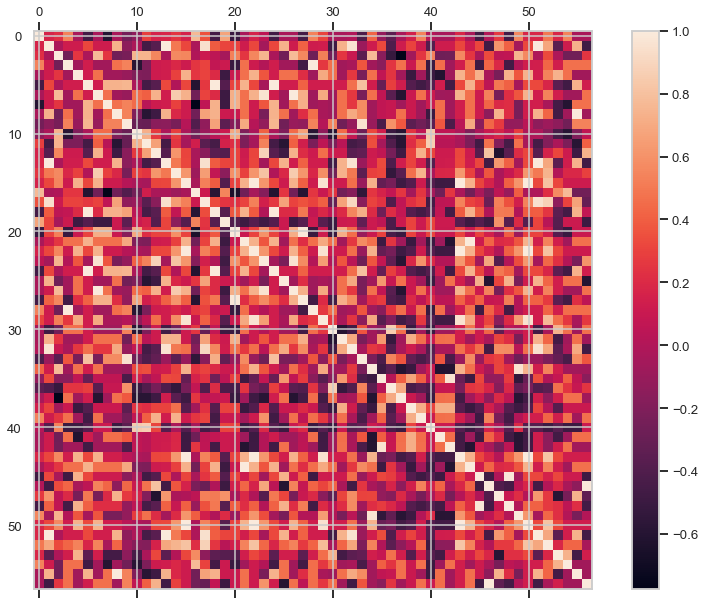

In [111]:
#import matplotlib.pyplot as plt
#%matplotlib inline

#correlation matrix
f = plt.figure(figsize=(14, 10))
plt.matshow(correlations_cat, fignum=f.number)
#plt.xticks(range(correlations_cat.shape[1]), correlations_cat.columns, fontsize=14, rotation=45)
#plt.yticks(range(correlations_cat.shape[1]), correlations_cat.columns, fontsize=14)
cb = plt.colorbar()

In [112]:
dataset_cat3 = dataset_cat2.replace(0, np.nan)

In [113]:
# Find a list of missing ratings for the user
missing_ratings = dataset_cat3.loc[user_id]
missing_ratings = missing_ratings[missing_ratings.isnull()]
missing_ratings

fashion          NaN
food_and_drink   NaN
fun_and_gifts    NaN
others           NaN
Name: a1874c5550d2f0bc14cc122164603713, dtype: float64

In [114]:
# make predictions
user_mean = dataset_cat3.loc[user_id].mean()
neighbours_means = neighbours_ratings.mean(axis=1)
for product_name, val in missing_ratings.iteritems():
    rating = 0
    weights_sum = 0
    for neighbour_id, row in neighbours_ratings.iterrows():
        if np.isnan(row[product_name]): continue
        rating += neighbours_corr.loc[neighbour_id] * (row[product_name] - neighbours_means.loc[neighbour_id])
        weights_sum += abs(neighbours_corr.loc[neighbour_id])
    if weights_sum > 0:
        rating /= weights_sum
    rating += user_mean
    missing_ratings.at[product_name] = rating
missing_ratings.sort_values(ascending=False)[0:5]

others            3.090467
fun_and_gifts     2.683593
food_and_drink    2.477864
fashion           2.477864
Name: a1874c5550d2f0bc14cc122164603713, dtype: float64

Vow, much better results then we got with all the variables!

#### Item-Item

We keep using the same user

In [115]:
K = 5
user_id = 'a1874c5550d2f0bc14cc122164603713'

correlations = dataset_cat2.corr()

In [116]:
for product_name, val in missing_ratings.iteritems():
    rating = 0
    weights_sum = 0
    neighbours_corr = correlations[product_name].sort_values(ascending=False)[1: K+1]
    item_mean = dataset_cat2[product_name].mean()
    neighbours_ratings = dataset_cat2[neighbours_corr.index].transpose()
    neighbours_means = neighbours_ratings.mean(axis=1)
    for neighbour_id, row in neighbours_ratings.iterrows():
        if np.isnan(row[user_id]): continue
        rating += neighbours_corr[neighbour_id] * (row[user_id] - neighbours_means[neighbour_id])
        weights_sum += abs(neighbours_corr[neighbour_id])
    if weights_sum > 0:
        rating /= weights_sum
    rating += item_mean
    missing_ratings.at[product_name] = rating
missing_ratings.sort_values(ascending=False)[0:5]

others            2.340219
food_and_drink    0.816680
fashion           0.143830
fun_and_gifts    -1.481109
Name: a1874c5550d2f0bc14cc122164603713, dtype: float64

We also get a good recommendation here!

#### Matrix factorization

Again we use the same customer

In [117]:
user_ids, product_ids, ratings = [], [], []
#
for user_id, row in dataset_cat2.iterrows():
    for product_id in dataset_cat2.columns:
        rating = row[product_id]
        if not np.isnan(rating):
            user_ids.append(user_id)
            product_ids.append(product_id)
            ratings.append(rating)
ratings_df = pd.DataFrame({'userID':user_ids, 'productID':product_ids, 'rating':ratings})
ratings_df = ratings_df[['userID', 'productID', 'rating']] # correct order

In [118]:
reader = Reader(rating_scale=(0.5, 5.0))
data_surprise = Dataset.load_from_df(ratings_df, reader)
data_train_surprise = data_surprise.build_full_trainset() # use the whole training set

In [119]:
n_factors = 15
lr_all = 0.005 # default value
reg_all = 0.02 # default value
#
model = SVD(n_factors=n_factors, lr_all=lr_all, reg_all=reg_all)
model.fit(data_train_surprise)

In [120]:
user_id = 'a1874c5550d2f0bc14cc122164603713'
missing_products_ids = dataset_cat3[dataset_cat3.isna()].loc[user_id].index
#
recommendations = []
for product_id in missing_products_ids:
    r = model.predict(user_id, product_id, verbose=False).est
    recommendations.append((product_id, r))
    #print(product_id)
    #break
recommendations.sort(reverse=True, key=lambda x: x[1])
recommendations[:5]

[('home_and_family', 2.943722209278523),
 ('others', 2.4424187792190564),
 ('technology', 2.2051096671246686),
 ('selfcare', 2.029687096895305),
 ('construction_and_garden', 1.8970161123246798)]

Alright, we get good results for all the methods with this new approach, but let's find out which one is the best.

#### Model - train/test


In [121]:
# ID as index
train_cat = train_cat.set_index('customer_unique_id')


Adjusting the database to the correct format to process further

In [122]:
user_ids, products_ids, ratings = [], [], []
#
for user_id, row in train_cat.iterrows():
    #print(row)
    for product_id in train_cat.columns:
        #print(product_id, user_id)
        rating = row[product_id]
        if not np.isnan(rating):
            #print(product_id, user_id, row[product_id])
            user_ids.append(user_id)
            products_ids.append(product_id)
            ratings.append(rating)
ratings_df = pd.DataFrame({'userID':user_ids, 'ProductID':products_ids, 'rating':ratings})
ratings_df = ratings_df[['userID', 'ProductID', 'rating']] # correct order


Same problem as above, we have to create a sample

In [123]:
# create sample
ratings_df = ratings_df[0:500]
len(ratings_df)

500

In [124]:
# train/test , 70/30
train_ind, test_ind = [], []
#
for product_id in ratings_df['ProductID'].unique():
    rows = ratings_df[ratings_df['ProductID'] == product_id]
    ind = rows.index[:2].values.tolist()
    train_ind += ind
#
c = 0.7
b = len(train_ind) / len(ratings_df)
a = (c - b) / (1 - b)
print(a)



0.6900826446280991


In [125]:
all_ind = set(range(len(ratings_df)))
not_used = list(all_ind - set(train_ind))
not_done = True
np.random.seed(50)
while not_done:
    np.random.shuffle(not_used)
    train_ind_ = train_ind + not_used[:int(a * len(not_used))]
    df_train = ratings_df.loc[train_ind_]
    if ratings_df.nunique()['ProductID'] == df_train.nunique()['ProductID'] and ratings_df.nunique()['userID'] == df_train.nunique()['userID']:
        not_done = False
        train_ind = train_ind_
#
test_ind = list(all_ind - set(train_ind))
#
train_ind = sorted(train_ind)
test_ind = sorted(test_ind)

In [126]:
df_train = ratings_df.iloc[train_ind]
df_test = ratings_df.iloc[test_ind]

In [127]:
y_true = df_test['rating'].values

RMSE = 2.0819233654506824


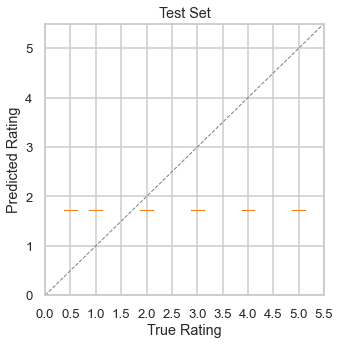

In [128]:
# global mean
global_mean = df_train['rating'].mean()
# prediction
y_pred = []
for i, row in df_test.iterrows():
    y_pred.append(global_mean)
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# or simply y_pred = np.array([global_mean for i in range(len(y_true))])
# performance
error6 = RMSE(y_true, y_pred)
print("RMSE =", error6)
MakeBoxplot(y_true, y_pred, 'Test Set')

RMSE = 2.312291474367536


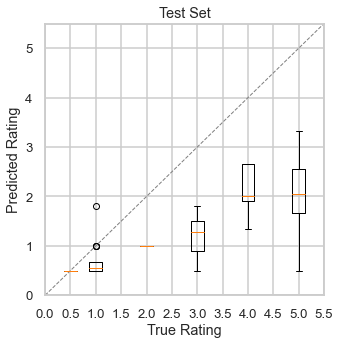

In [129]:
# user mean
user_mean = df_train.groupby('userID')['rating'].mean()
# prediction
y_pred = []
for i, row in df_test.iterrows():
    y_pred.append(user_mean[row['userID']])
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error7 = RMSE(y_true, y_pred)
print("RMSE =", error7)
MakeBoxplot(y_true, y_pred, 'Test Set')

RMSE = 1.1784461105227992


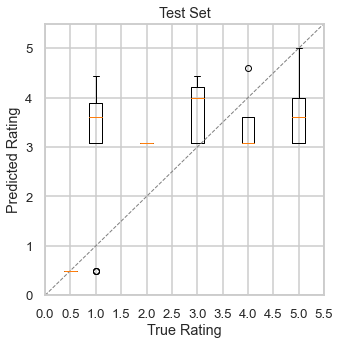

In [130]:
# product mean
product_mean = df_train.groupby('ProductID')['rating'].mean()
# prediction
y_pred = []
for i, row in df_test.iterrows():
    y_pred.append(product_mean[row['ProductID']])
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error8 = RMSE(y_true, y_pred)
print("RMSE =", error8)
MakeBoxplot(y_true, y_pred, 'Test Set')

RMSE = 1.2194589800953919


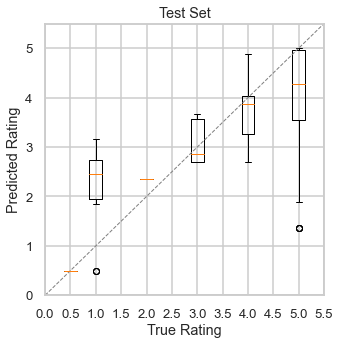

In [131]:
# Combined model
# prediction
y_pred = []
for i, row in df_test.iterrows():
    r = user_mean[row['userID']] + product_mean[row['ProductID']] - global_mean
    y_pred.append(r)
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error9 = RMSE(y_true, y_pred)
print("RMSE =", error9)
MakeBoxplot(y_true, y_pred, 'Test Set')

As we did above, let's run the SVD model also

In [132]:
reader = Reader(rating_scale=(0.5, 5.0))
data_surprise = Dataset.load_from_df(df_train, reader)

In [133]:
param_grid = {
    #'n_epochs': [20], 
    #'lr_all': [0.005, 0.05],
    'reg_all': [0.01, 0.1], 
    'n_factors': [10, 25, 50],
    #'biased': [True, False]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data_surprise)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0008561322818295
{'reg_all': 0.01, 'n_factors': 50}


In [134]:
# We can now use the algorithm that yields the best rmse:
model = gs.best_estimator['rmse']
model.fit(data_surprise.build_full_trainset())

In [135]:
user_ids_true = df_test['userID'].values
product_ids_true = df_test['ProductID'].values

RMSE = 0.7745193565461513


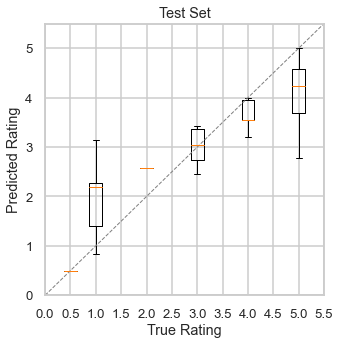

In [136]:
y_pred = []
for user_id, product_id in zip(user_ids_true, product_ids_true):
    r = model.predict(user_id, product_id, verbose=False).est
    y_pred.append(r)
y_pred = np.array(y_pred)
# performance
error10 = RMSE(y_true, y_pred)
print("RMSE =", error10)
MakeBoxplot(y_true, y_pred, 'Test Set')

Let's compare the results in next chapter!

### Results

In [137]:
print('------------------------All_variables--------------------------')
print("--baselines--")
print('Global mean: ', error1)
print('Users mean: ', error2)
print('Products mean: ', error3)
print('Combined: ', error4)
print("SVD: ", error5)
print('------------------------Categorized--------------------------')
print("--baselines--")
print('Global mean: ', error6)
print('Users mean: ', error7)
print('Products mean: ', error8)
print('Combined: ', error9)
print('SVD: ', error10)

------------------------All_variables--------------------------
--baselines--
Global mean:  1.5793638613665295
Users mean:  0.4866642633922875
Products mean:  1.5066578980127778
Combined:  0.6767444531554628
SVD:  1.012306646527686
------------------------Categorized--------------------------
--baselines--
Global mean:  2.0819233654506824
Users mean:  2.312291474367536
Products mean:  1.1784461105227992
Combined:  1.2194589800953919
SVD:  0.7745193565461513


By combining the Global mean rating (average of all ratings), User means rating (average of all ratings from the user) and the Product mean rating (average of all ratings for the product) we get the lowest RMSE. We get the lowest in both cases, for all variables and categorized. The benefit of the combination is that it characterizes the matching between users and the products. The combination of the baselines also surprisingly outperforms the SVD method in both cases. 

We have to take that into account that the cons of the RMSE are that it often penalise methods that do well for high ratings and badly for others. To get better results, the implementation of Latent factors, Collaborative filtering and Biases would take the analysis to the next level.  



By categorizing the products and reducing the columns from 68 to 7, we were able to create more detailed insights to recommend things to the customer. 

# Sentimental Analysis

As stated before, for the implementation of the sentimental classifier, we will use a external dataset. The data set used can be found using the following link: 

 * https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis
 
The .csv file we used is called "Train200.csv". It consists of 200K tweets in Portuguese, with no theme, already classified in "positive" and "negative" tweets.

We will implement two models. First a simple one, using Logical Regression Classifier, then one using Xgboost. The models will then be compared and a decision made regarding what model we will use for the olist dataset.

## Reading in Tweet data

In [138]:
path = "/Users/ThorvaldurIngi/Desktop/DTU/Nr.2/Advanced_Business_Analytics/Group Project/Data/Tweets"

In [139]:
df_tweets = pd.read_csv(path + "/" + "Train200.csv", sep = ";")
df_tweets.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ThorvaldurIngi/Desktop/DTU/Nr.2/Advanced_Business_Analytics/Group Project/Data/Tweets/Train200.csv'

As it can be seen above, the data is in 5 columns. The columns we will only be focusing on is the tweet text and sentiment.

The values in the sentiment column are binary:

* 0 if the tweet is negative
* 1 if the tweet is positive

The number of each kind of tweets are equal, both 100K

Furthermore, the tweets are messy and need to be processed before the further classification can be done.

## Processing tweets

Using the nltk library, we import the RSLPStemmer, which is compatible with Portuguese, and from the stop words library, we import get_stopwords and fetch common stop words found in the Portuguese language.

In [ ]:
from stopwords import get_stopwords 
import string 
from nltk.stem import RSLPStemmer
import re

stemmer = RSLPStemmer()
stop_words = get_stopwords('pt')

For the text processing of the tweets, what we have identified what needs to be done is the following:

* Remove Emojis
* Remove tagged accounts (accounts following the @ sign)
* Remove hashtags 
* Remove hyperlinks
* Remove numbers
* Remove punctuations
* Put everything into lower case
* Remove stop words
* Stemming

All these tasks are done with the help of the following two funcitons:

In [ ]:
# Fucntion to remove emojies from text
# ref: https://stackoverflow.com/questions/43797500/python-replace-unicode-emojis-with-ascii-characters/43813727#43813727
def deEmojify(inputString):
    #input:  text string
    #output: text string with all emojies removed
    return inputString.encode('ascii', 'ignore').decode('ascii')


In [ ]:
# Function to process text
# ref: Notebooks from class (modified)
def text_processing(text):
    #input: text string
    #output: processed text string:
    
    #remove emojis
    text = deEmojify(text)
    
    #remove accounts
    text = re.sub("@[^\s]+", "", text)
    
    #remove hashtags 
    text = re.sub("(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", "", text)

    #remove hyperlinks
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    text = re.sub('www\.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text) 
    #remove numbers
    text = re.sub(r'[0-9]+', '', text)
    
    # remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # lowercase
    text = "".join([c.lower() for c in text])
    # remove stopwords
    text = " ".join([w for w in text.split() 
                     if w not in stop_words])
    # stemming / lematizing (optional)
    text = " ".join([stemmer.stem(w) for w in text.split()])
    return text

Now, we process all tweets by using the apply function and with the newly constructed function text_processing

In [ ]:
df_tweets['tweet_text_clean'] = df_tweets[
    'tweet_text'].apply(lambda x: text_processing(x)
                                    if type(x) == str else x) #only apply if value is string

## Vectorize tweets

From the sklearn library, we import CountVectorizer and TfidfTransformer to vectorize the tweets.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vect = CountVectorizer()
tf_transformer = TfidfTransformer()

First, we create a bag-of-words using the CountVectorizer and all the tweets. Then, we transform that into term frequency inverse document frequency vectors using the DfidfTransformer.

In [ ]:
bow_counts = count_vect.fit_transform(df_tweets['tweet_text_clean'].values)
bow_tfidf = tf_transformer.fit_transform(bow_counts)

Now we are ready to train some classifier models.

## Classifier models

Using the sklearn library's train_test_split function, we split the data for testing and training the models. A decision was made to have the training data 80% and the testing data 20% of the whole dataset.

In [ ]:
from sklearn.model_selection import train_test_split
x = bow_tfidf
y = df_tweets["sentiment"]
rs = 123 # reproducible results, set to None for random
(x_train, x_test, y_train, y_test) = train_test_split(
    x, y,
    test_size=0.2, stratify=y, random_state=rs)

To help with the evaluation of the models, we will use the two following functions:

In [ ]:
# Evaluation of Model
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

def eval_model(ytest, ypred):
    #input: true, and predicted data
    print("accuracy = {}".format(accuracy_score(ytest, ypred)))     
    print("f1 score = {}".format(f1_score(ytest, ypred)))          
    print("rmse     = {}".format(np.sqrt(mean_squared_error(ytest, ypred))))

In [ ]:
# plotting a confusion matrix
# ref: https://scikit-learn.org/0.20/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### Logistic Regression Classifier

The first model we will be training is a Logistic Regression classifier model. This model was chosen for both its simplicity and performance.

In [ ]:
# training a logistic reggression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.1, 1, 10]} #parameter range
lr = GridSearchCV(LogisticRegression(class_weight='balanced', solver='newton-cg', max_iter = 150), 
                  parameters, cv=5)

lr = lr.fit(x_train, y_train) #fit
y_pred = lr.predict(x_test)   #preididct

In [ ]:
# Evaluation of Model
eval_model(y_test,y_pred)

In [ ]:
# confusion matrix
labels = np.array(["negative","positive"])
plot_confusion_matrix(y_test, y_pred, labels)
plt.show()

The evaluation of the model is relatively decent. The accuracy and the F1-score is similar and the RMSE acceptable. 
But we want to check if we can do better and for that we will use the Xgboost Classifier.

### Xgbost Classifier

XgBoost is on of the most used machine learning algorithms today, for both regression and classification. It stands for Extreme Gradient Boosting and belongs to family of boosting algorithms. Since it is a boosting algorithm, which works on the princible of an ensemble, it combines a set of weak learners and delivers improved prediciton accuracy.


In order to try to improve our previous classifier, using a logical regression classifier, we will try to implement an effective XgBoost classifier. The first thing to to is the trans from the data, test and train, so it is compatible with the XgBoost algorithm.

In [ ]:
import xgboost as xgb

# restructure test and training data for Xgb
xgb_train = xgb.DMatrix(x_train, y_train)
xgb_test = xgb.DMatrix(x_test, y_test)

Then we can train the model. Due to lack of knowledge regarding the parameters to use, we only used the main ones, eta and max_depth, to keep it as simple as possible. 

In [ ]:
# Setting the Parameters of the model
param = {'eta': 0.7,
         'max_depth': 30} 

# Training the Model
xgb_model = xgb.train(param, xgb_train, num_boost_round = 20) #fit
# Predicting using the Model
y_pred = xgb_model.predict(xgb_test)
y_pred = np.where(np.array(y_pred) > 0.5, 1, 0) # converting binary

In [ ]:
# Evaluation of Model
eval_model(y_test, y_pred)

In [ ]:
# confusion matrix
labels = np.array(["negative","positive"])
plot_confusion_matrix(y_test, y_pred, labels)
plt.show()

As it can be seen from the evaluation of the XgBoost Classifier, both the accuracy and the F1-score is lower when compared to the scores obtained using the Logical Regression Classifier. The reason for this might be that the model is not configured correctly.

But since the Logical Regression Classifier seems to be performing better, it will be the model we continue to use for the classification of the order reviews in the olist dataset.

## Classifier used on the olist dataset

Now we will use the Logical Regression Classifier to classify all order reviews into either negative or positive review. 

The first thing we will do is to reduce the current dataframe, df_olist, into a smaller, more convenient dataframe for the analysis. In the new dataframe we will only include the following columns:

* order_id
* review_id
* review_score
* review_comment_message

Then we will remove, all duplicates of fond in the review_id column.

In [ ]:
df_olist_senti = df_olist[['order_id','review_id', 'review_score', 'review_comment_message']]
df_olist_senti = df_olist_senti.drop_duplicates(subset="review_id") #drop duclicates

The next step is then to classify each review using the Logical Regression Classifier. This is done with the help of the function seen below. The function starts by processing the text input, then it vectorizes the clean text and finally predicts using the inputed classifier model.

In [ ]:
# function to classify text using a previously constructed classifier model.

def sentiment_classifier(txt, classifier_model):
    #input: text string and a classifier model
    #output: classification of inputed text
    
    clean_target = text_processing(txt) #text process
    bow_count_target = count_vect.transform([clean_target]) #bag of words
    bow_tfidf_target = tf_transformer.transform(bow_count_target) #tf-idf
    return classifier_model.predict(bow_tfidf_target)[0] #predict

In [ ]:
# classify reviews using the sentiment_classifier function
df_olist_senti['review_sentiment'] = df_olist_senti[
    'review_comment_message'].apply(lambda x: sentiment_classifier(x, lr)
                                    if type(x) == str else np.nan) # only apply if x is str

In [ ]:
# map 0 and 1 to "Negative" and "Positive"
df_olist_senti["review_sentiment"] = df_olist_senti["review_sentiment"].map({0:"Negative", 1:"Positive"})

In [ ]:
# First look, Average review with respect to predicted sentiment
df_olist_senti.groupby("review_sentiment").mean().plot.bar()
plt.show()

From the initial look seen on the plot above, we see that the average review score for negatively predicted reviews is roughly 2.5 and for the positively predicted reviews, it is close to 3.7. 
This is an indicator that the classification is somewhat correct, since a review score of 3 can be interpreted as being a neutral score.

To make any conclusions though ,we will need to dive deeper into the matter to see if everything is behaving like it should be.

The first thing we could to is to look at he distribution of reviews score among the predicted sentiments of reviews. This can be seen below.

In [ ]:
# constructing now dataframe for stats
sentiment_stats = pd.DataFrame({"sentiment_count":df_olist_senti.groupby(["review_score"])["review_sentiment"].value_counts()})
sentiment_stats = sentiment_stats.reset_index()
sentiment_stats = sentiment_stats.pivot(index = 'review_score', columns = 'review_sentiment', values = 'sentiment_count')
sentiment_stats.plot.bar(subplots = True, rot = 1)
plt.show()


As it can be seen on the plot above, the majority of the reviews are predicted to the right class. That is, the largest group of review score withing the positively predicted sentimental class is 5 and for the negative class it is 1. But what is surprising is how many reviews with a review score of 5 are predicted as negative and how many reviews with a review score of 1 are predicted positive. In fact, these are the second larges groups in both cases.

The accuracy of the classifier, and its performance, is partly to blame, but it is still a strange outcome and thus we will investigate the two groups further.

* Group 1: Predicted negative but with a review score of 5
* Group 2: Predicted positive but with a review score of 1

First things first. We will merge the results into the originally merged dataframe, df_olist.

In [ ]:
df_olist = df_olist.merge(df_olist_senti[["review_id", "review_sentiment"]], how='left', on='review_id')

In [ ]:
# writing dataframe to .csv 
# df_olist.drop(["review_comment_message"], 
#               axis=1).to_csv("ABA_ProjectNotebook_olist.csv", 
#                              header=True, 
#                              index = False)
# df_olist = pd.read_csv("ABA_ProjectNotebook_olist.csv")

Additionally, the length of each review is calculated for further analysis.

In [ ]:
df_olist["review_comment_message_length"] = df_olist["review_comment_message"].apply(lambda x: len(x.split())
                                                                                    if type(x) == str else np.nan)

In [ ]:
# Average review length with respect to review score
df_olist.groupby(["review_score"])["review_comment_message_length"].mean()

In [ ]:
# Average review length with respect to review score and predicted sentiment
df_olist.groupby(["review_sentiment","review_score"])["review_comment_message_length"].mean()

From the two outputs above, wee can see that the reviews that get the highest score tend to have fewer words than the reviews that get a bad score. This is maybe not something that explains the previously mentioned groups, group 1 and group 2. Rather, when customers are unhappy, they tend to get a bit wordier. 

Further investigation into the two groups is thus needed.

## Investigation of Group 1 and Group 2

First, for simplicity sake, we will construct two new dataframes, one for group 1 and one for group 2. Both containing columns that we believe might explain their behavior.

In [ ]:
# constructing dataframe for group 1
df_group1 = df_olist.loc[(df_olist.review_sentiment == "Negative") & 
             (df_olist.review_score == 5), 
            ['order_id',
             'review_id', 
             'review_score',
             'review_comment_message',
             'review_comment_message_length',
             'product_category_name_english', 
             'order_purchase_dayName',
             'order_purchase_monthName', 
             'review_sentiment',
             'order_estimated_delivery_name',
             'order_delivery_days',
             'order_delivery_name']]

df_group1 = df_group1.drop_duplicates(subset = "review_id") #drop duclicates

In [ ]:
# constructing dataframe for group 2
df_group2 = df_olist.loc[(df_olist.review_sentiment == "Positive") & 
             (df_olist.review_score == 1), 
            ['order_id',
             'review_id', 
             'review_score',
             'review_comment_message',
             'review_comment_message_length',
             'product_category_name_english', 
             'order_purchase_dayName',
             'order_purchase_monthName', 
             'review_sentiment',
             'order_estimated_delivery_name',
             'order_delivery_days',
             'order_delivery_name']]

df_group2 = df_group2.drop_duplicates(subset = "review_id") #drop duclicates

First we will compare the most frequent categories

In [ ]:
# group 1
from pprint import pprint
print("---------- Group 1 ----------")
pprint(df_group1.groupby(["product_category_name_english"])["order_id"].count().nlargest(10))

print("")

# group 2
print("---------- Group 2 ----------")
pprint(df_group2.groupby(["product_category_name_english"])["order_id"].count().nlargest(10))

When the two groups in the output above are compared, it can be seen that the most frequent categories are rather similar, and thus this is not something that we believe might be the cause.

Next we look at the distribution of the purchase day, and the purchase month for the two groups.

In [ ]:
# distribution of purchase days
fig, axes = plt.subplots(2, sharex = True)
df_group1.groupby(["order_purchase_dayName"])["order_id"].count().plot.bar(ax=axes[0],title = "Group 1")
df_group2.groupby(["order_purchase_dayName"])["order_id"].count().plot.bar(ax=axes[1],title = "Group 2")
plt.show()

In [ ]:
# distribution of purchase months
fig, axes = plt.subplots(2, sharex = True)
df_group1.groupby(["order_purchase_monthName"])["order_id"].count().plot.bar(ax=axes[0],title = "Group 1")
df_group2.groupby(["order_purchase_monthName"])["order_id"].count().plot.bar(ax=axes[1],title = "Group 2")
plt.show()

By observing the two figures above, the only noticeable difference is in the distribution of purchase month. Group 1 seems to make more purchases during the summer months, while group 2 seems to do it more during the winter months. 

Next we will compare the estimated delivery time to the actual delivery time for the two groups.

In [ ]:
# Comparison of estimated and actual delivery times
fig, axes = plt.subplots(nrows = 2, ncols = 2, sharex = True)
df_group1.groupby(["order_estimated_delivery_name"])["order_id"].count().plot.bar(ax=axes[0,0], 
                                                                                  title = "Group 1")
df_group2.groupby(["order_estimated_delivery_name"])["order_id"].count().plot.bar(ax=axes[0,1], 
                                                                                  title = "Group 2")
df_group1.groupby(["order_delivery_name"])["order_id"].count().plot.bar(ax=axes[1,0])
df_group2.groupby(["order_delivery_name"])["order_id"].count().plot.bar(ax=axes[1,1])
plt.show()

From the figure above, a clear difference between the two groups can be noticed. The deliveries for group 1 seem to be earlier than estimated, compared to group 2 who seems to have much more late deliveries. 
This is definitely  something that might effect reviews and reviews scores.

For example, if your are satisfied with the product you ordered, but the delivery was late, you might give a low review score but a positive review message (group 2), and vice versa (group 1).

# Conclusion

## Recommender systems

As was stated in chapter five, most of the customer only bought few products. Therefore it made it difficult for us  to identify different behaviors between customers. When we converted the data-frames to matrices for our analysis, the problem was we had e.g. 1 rating in a row for 68 columns and the rest was empty. We came up with an idea to merge similar products into categories to address the problem. From there we had two case studies, one for all variables and the other for the categorized variables.   

In this chapter we explored four different systems:
* System 1: Recommends items to users, who haven't purchased (people who bought this, also bought this). Based on other users purchasing history and the similarity of ratings given by other users (Item-Item non personalized).
* System 2: Recommendation based on other items similar to the particular customer(Item-Item personalized).
* System 3: Recommendation based on tastes of other users similar to the customer we look at(User-User).
* System 4: Personalized Recommendation(Matrix factorization).

We used five different models to test our systems:
* Model 1: Global mean rating (average of all ratings)
* Model 2: User means rating (average of all ratings from the user)
* Model 3: Product mean rating (average of all ratings for the product)
* Model 4: Combination (Global + deviation of user + deviation of the product)
* Model 5: Singular value decomposition (SVD)

The first system was done independent of the two cases mentioned above, using all the categories. It's an easy and effective method that generated good results. Regarding case one, with all the categories, we managed to create some insight, but as was expected, the recommendation could be improved. The recommendation from case two, with the categorized variables, we managed to create great recommendation from systems 2, 3 & 4. 

The five models were used to estimate performance of system 2, system 3 and system 4. Due to lack of computational power we were only able to use a subset of 500 purchases that affected our model analysis. Our results showed that model 4, combination, outperformed the rest of the models, with the lowest RMSE coefficient. Building a good recommender system is not an easy task.  Developing an efficient recommender system that provides key insight requires a strong dataset. In our case, implementing a recommendation system with the Olist dataset turned out to be a challenge.

## Sentimental Analysis

By using the external dataset, containing tweets in Portuguese, we managed to construct a relatively scalable, and more unbiased classifier than if it were constructed using the olist dataset. 

We constructed two models, the first by using a Logistic Regression classifier and the second by using a XgBoost classifier. By evaluating the two models, and with comparison, we decided to use the Logistical Regression classifier for the sentimental analysis of the reviews from the olist dataset.


After the classification of the reviews. Two groups stood out:

* Group 1: Predicted negative but with a review score of 5
* Group 2: Predicted positive but with a review score of 1

An investigation into the two groups led us to believe that a plausible reason for the strange behavior of the two groups might be related to early and late deliveries. This indicates that olist needs to look into their logistics and transportation channels in order to improve their customer satisfaction.
